<a href="https://colab.research.google.com/github/zakiyyah-ai/Analisa-Klasifikasi-Pinjaman-bagi-Nasabah/blob/main/Klasifikasi_Pinjaman_Nasabah.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
install.packages("ggplot2", lib="/usr/local/lib/R/site-library")

In [4]:
install.packages("RColorBrewer", lib="/usr/local/lib/R/site-library")

In [5]:
install.packages("corrplot", lib="/usr/local/lib/R/site-library")

In [13]:
data = read.csv("/bin/project.csv")
head(data)

X NAMA_NASABAH           NOMOR_KONTRAK DOMISILI        KARAKTER        
1 0 YOLI SEPINA NAINGGOLAN 0             MASIH TETAP     KOOPERATIF      
2 1 ERWIN NASUTION         1             MASIH TETAP     TIDAK KOOPERATIF
3 2 HUSIN                  2             MASIH TETAP     TIDAK KOOPERATIF
4 3 HARITSYAH              3             PINDAH PERMANEN KOOPERATIF      
5 4 HARIRI PANGGABEAN      4             MASIH TETAP     TIDAK KOOPERATIF
6 5 JHON PREDDY HUTABARAT  5             MASIH TETAP     KOOPERATIF      
  PROFESI              KONDISI_USAHA KONDISI_JAMINAN STATUS PRODUK PYD      
1 IBU RUMAH TANGGA     2             Baik            2      3       30000000
2 NELAYAN              3             Rusak           8      3       10000000
3 LAINNYA              3             Baik            8      3       60000000
4 PNS                  1             Rusak           7      3       90000000
5 WIRAUSAHA / PEDAGANG 1             Baik            8      3      150000000
6 WIRAUSAHA / PEDAGANG 1             Baik            7      3       40000000
  TENOR OSL      KEWAJIBAN KOLEKTIBILITAS          COUNT_SURVEY
1 24    28750000 4896841   DALAM PENGAWASAN KHUSUS 1           
2 12     2040693       0   MACET                   1           
3 24           0       0   MACET                   1           
4 18           0       0   MACET                   1           
5 18    19844807       0   MACET                   1           
6 36    27298726 2208516   DALAM PENGAWASAN KHUSUS 1           
  REKOMENDASI_TINDAK_LANJUT
1 Angsuran Biasa           
2 Penarikan                
3 Penarikan                
4 Angsuran Biasa           
5 Penarikan                
6 Restrukturisasi

In [14]:
colnames(data)

[1] "X"                         "NAMA_NASABAH"             
 [3] "NOMOR_KONTRAK"             "DOMISILI"                 
 [5] "KARAKTER"                  "PROFESI"                  
 [7] "KONDISI_USAHA"             "KONDISI_JAMINAN"          
 [9] "STATUS"                    "PRODUK"                   
[11] "PYD"                       "TENOR"                    
[13] "OSL"                       "KEWAJIBAN"                
[15] "KOLEKTIBILITAS"            "COUNT_SURVEY"             
[17] "REKOMENDASI_TINDAK_LANJUT"

In [15]:
summary(data$OSL)

     Min.   1st Qu.    Median      Mean   3rd Qu.      Max. 
        0   3999950   8687350  26562373  32082900 440932336 

In [16]:
str(data)

'data.frame':	1000 obs. of  17 variables:
 $ X                        : int  0 1 2 3 4 5 6 7 8 9 ...
 $ NAMA_NASABAH             : chr  "YOLI SEPINA NAINGGOLAN" "ERWIN NASUTION" "HUSIN" "HARITSYAH" ...
 $ NOMOR_KONTRAK            : int  0 1 2 3 4 5 6 7 8 9 ...
 $ DOMISILI                 : chr  "MASIH TETAP" "MASIH TETAP" "MASIH TETAP" "PINDAH PERMANEN" ...
 $ KARAKTER                 : chr  "KOOPERATIF" "TIDAK KOOPERATIF" "TIDAK KOOPERATIF" "KOOPERATIF" ...
 $ PROFESI                  : chr  "IBU RUMAH TANGGA" "NELAYAN" "LAINNYA" "PNS" ...
 $ KONDISI_USAHA            : int  2 3 3 1 1 1 3 2 2 3 ...
 $ KONDISI_JAMINAN          : chr  "Baik" "Rusak" "Baik" "Rusak" ...
 $ STATUS                   : int  2 8 8 7 8 7 7 7 7 3 ...
 $ PRODUK                   : int  3 3 3 3 3 3 3 3 3 3 ...
 $ PYD                      : int  30000000 10000000 60000000 90000000 150000000 40000000 60000000 7500000 45000000 50000000 ...
 $ TENOR                    : int  24 12 24 18 18 36 36 4 24 36 ...
 $ OSL    

In [18]:
data_reduce = data[-c(1,2)]
head(data_reduce)

NOMOR_KONTRAK DOMISILI        KARAKTER         PROFESI             
1 0             MASIH TETAP     KOOPERATIF       IBU RUMAH TANGGA    
2 1             MASIH TETAP     TIDAK KOOPERATIF NELAYAN             
3 2             MASIH TETAP     TIDAK KOOPERATIF LAINNYA             
4 3             PINDAH PERMANEN KOOPERATIF       PNS                 
5 4             MASIH TETAP     TIDAK KOOPERATIF WIRAUSAHA / PEDAGANG
6 5             MASIH TETAP     KOOPERATIF       WIRAUSAHA / PEDAGANG
  KONDISI_USAHA KONDISI_JAMINAN STATUS PRODUK PYD       TENOR OSL     
1 2             Baik            2      3       30000000 24    28750000
2 3             Rusak           8      3       10000000 12     2040693
3 3             Baik            8      3       60000000 24           0
4 1             Rusak           7      3       90000000 18           0
5 1             Baik            8      3      150000000 18    19844807
6 1             Baik            7      3       40000000 36    27298726
  KEWAJIBAN KOLEKTIBILITAS          COUNT_SURVEY REKOMENDASI_TINDAK_LANJUT
1 4896841   DALAM PENGAWASAN KHUSUS 1            Angsuran Biasa           
2       0   MACET                   1            Penarikan                
3       0   MACET                   1            Penarikan                
4       0   MACET                   1            Angsuran Biasa           
5       0   MACET                   1            Penarikan                
6 2208516   DALAM PENGAWASAN KHUSUS 1            Restrukturisasi

In [19]:
data_reduce[, 8:11] = sapply(data_reduce[, 8:11], as.numeric)

In [21]:
data_kategorik = data_reduce[,c("KONDISI_USAHA","KONDISI_JAMINAN","REKOMENDASI_TINDAK_LANJUT")]
chisq.test(data_kategorik$KONDISI_JAMINAN, data_kategorik$KONDISI_USAHA)
par(mfrow=c(2,2))
data_reduce$REKOMENDASI_TINDAK_LANJUT = as.factor(data_reduce$REKOMENDASI_TINDAK_LANJUT)

Warning message in chisq.test(data_kategorik$KONDISI_JAMINAN, data_kategorik$KONDISI_USAHA):
“Chi-squared approximation may be incorrect”



	Pearson's Chi-squared test

data:  data_kategorik$KONDISI_JAMINAN and data_kategorik$KONDISI_USAHA
X-squared = 18.181, df = 6, p-value = 0.005796


corrplot 0.84 loaded



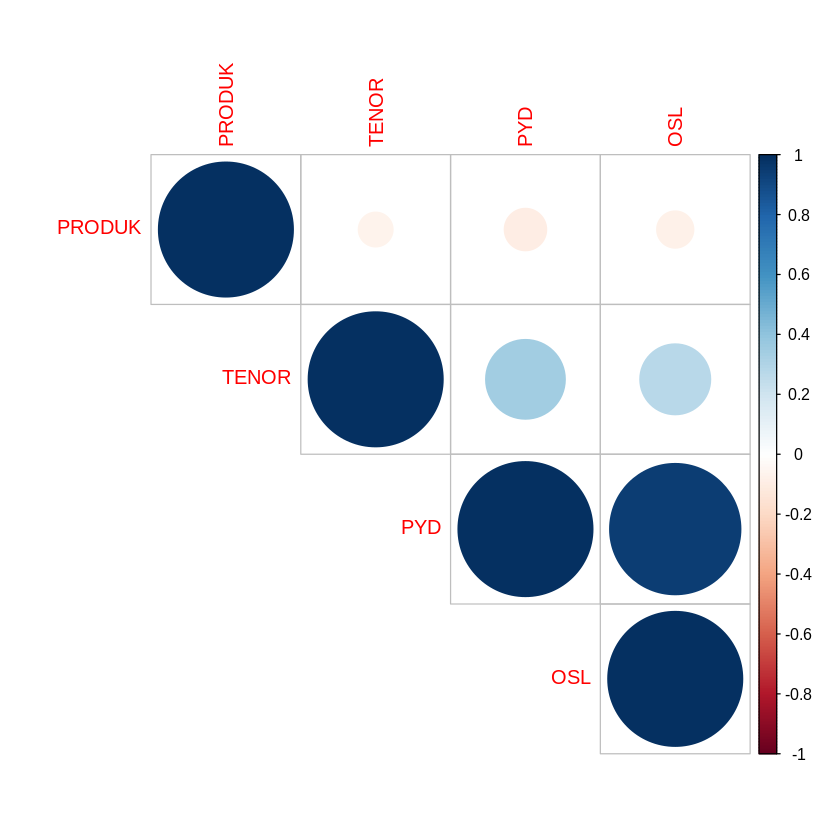

ERROR: ignored

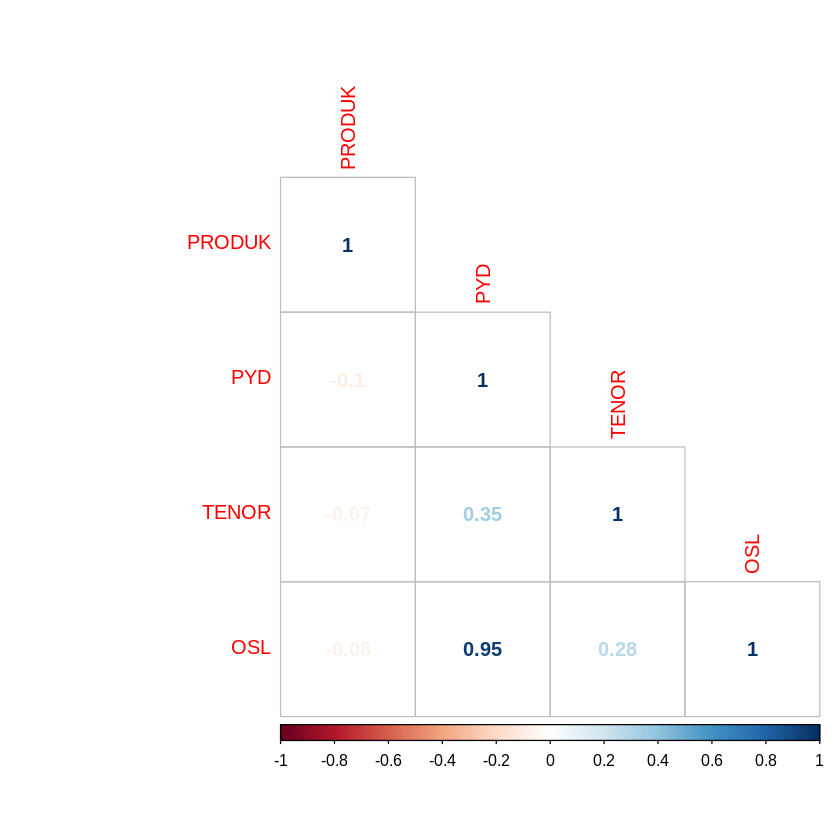

In [22]:
library(corrplot)
M = cor(data_reduce[,8:11])
corrplot(M, type="upper", order="hclust")
corrplot(M,
		 method = 'number',
		 type = "lower")
corr = round(cor(M), 1)
ggcorrplot(corr, hc.order = TRUE,
		   type = "lower",
		   lab = TRUE,
		   lab_size = 3,
		   method="circle",
		   colors = c("tomato2", "white", "springgreen3"),
		   title="Correlogram of Data Nasabah",
		   ggtheme=theme_bw)
cor(M, use="complete.obs", method="kendall")
corrplot(M, method = "ellipse")